## Coulomb Stopping Powers

Module stoppingpower contains routines for numerical integration of stopping powers for incident charged particles Coulomb scattering off a $T=0$ Fermi sea of electrons.  No asumptions are made about the incident particle's mass or initial kinematics.   

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,10]

import stoppingpower as sp

In [2]:
m_electron = 0.5 # MeV
Z_electron = -1.0 # charge

n_electron = 10**32 # cm^{-3}, electron number density

M_carbon = 10**4 # MeV
Z_carbon = 6.0
M_pion = 10**2 # Mev
Z_pion = 1.0

In [3]:
wd = sp.FermiSea_StoppingPower(m=m_electron, n0=n_electron, 
                               masstolength=sp.MeV_to_InvCM)

In [4]:
dedx_carbon_func = wd.get_ion_coulomb_stopping_power(M_carbon, Z_carbon)
dedx_pion_func = wd.get_ion_coulomb_stopping_power(M_pion, Z_pion)

In [5]:
ke = np.logspace(-4, 8, 1000)

In [6]:
dedx_carbon, dedx_carbon_error = dedx_carbon_func(ke, samples=10**4)
dedx_pion, dedx_pion_error = dedx_pion_func(ke, samples=10**4)

Process Process-55:
Traceback (most recent call last):
  File "/home/rjanish/installs/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/rjanish/installs/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "/home/rjanish/installs/anaconda2/lib/python2.7/site-packages/skmonaco/mp.py", line 19, in fun
    q_out.put((i,f(x)))
  File "/home/rjanish/installs/anaconda2/lib/python2.7/site-packages/skmonaco/miser.py", line 49, in func
    rng=self.rng,seed=seed)
  File "skmonaco/_miser.pyx", line 212, in skmonaco._miser.integrate_miser (skmonaco/_miser.c:3886)
  File "skmonaco/_miser.pyx", line 174, in skmonaco._miser.miser_kernel (skmonaco/_miser.c:3160)
  File "skmonaco/_miser.pyx", line 174, in skmonaco._miser.miser_kernel (skmonaco/_miser.c:3160)
  File "skmonaco/_miser.pyx", line 174, in skmonaco._miser.miser_kernel (skmonaco/_miser.c:3160)
  File "skmonaco/_miser.

KeyboardInterrupt: 

In [6]:
dedx_carbon *= -1.0
dedx_pion *= -1.0

NameError: name 'dedx_carbon' is not defined

NameError: name 'dedx_carbon' is not defined

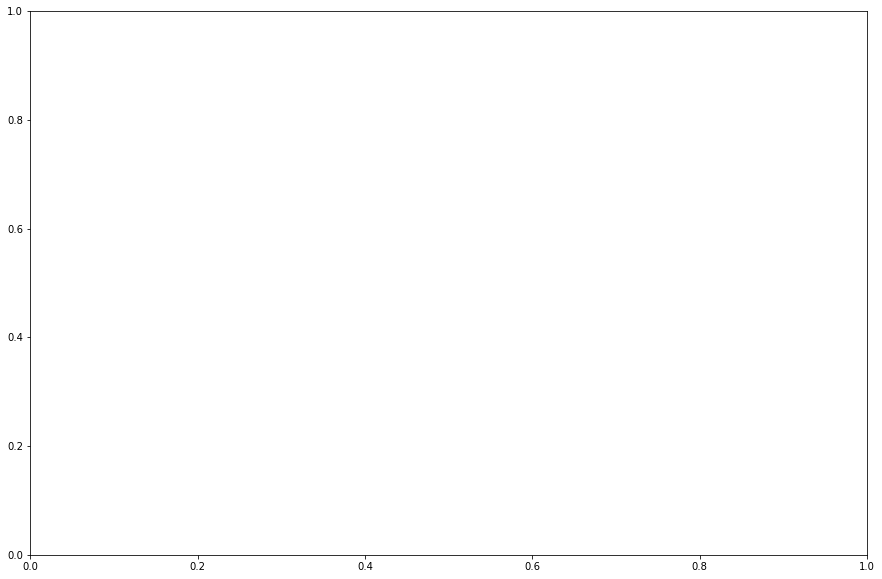

In [7]:
fig, ax = plt.subplots()
ax.errorbar(ke, dedx_carbon, yerr=dedx_carbon_error, alpha=0.4,
            marker='.', linestyle='', color='r', label='carbon numerical')
ax.errorbar(ke, dedx_pion, yerr=dedx_pion_error, alpha=0.4,
            marker='.', linestyle='', color='b', label='pion numerical')
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend(loc="best")
plt.show()

In [7]:
dedx_carbon_limiting_func = wd.high_density_limiting(M_carbon, Z_carbon)
dedx_pion_limiting_func = wd.high_density_limiting(M_pion, Z_pion)

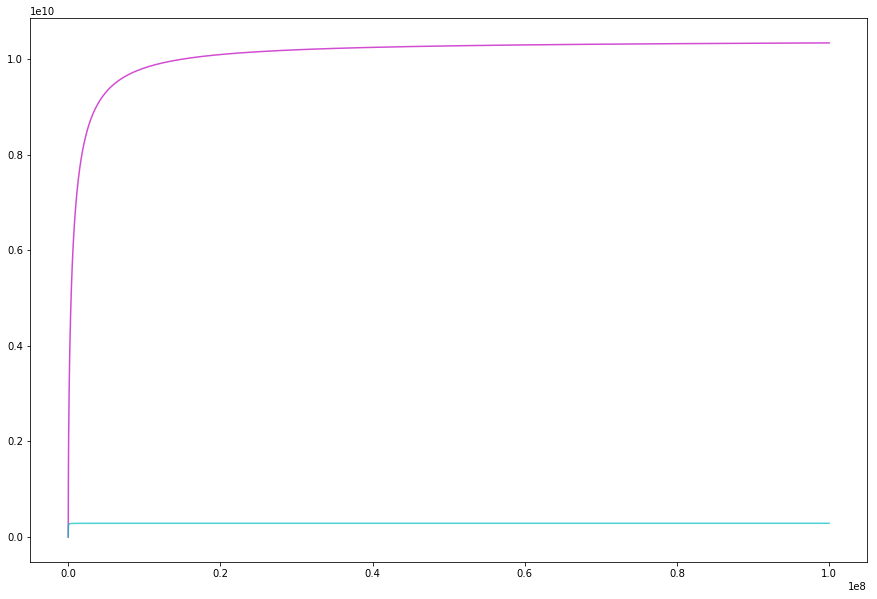

In [9]:
fig, ax = plt.subplots()

ax.plot(ke, dedx_carbon_limiting_func(ke), alpha=0.7,
        marker='', linestyle='-', color='m', 
        label='carbon limiting approx')
ax.plot(ke, dedx_pion_limiting_func(ke), alpha=0.7,
        marker='', linestyle='-', color='c',
        label='pion limiting approx')


In [10]:
def momentum_threshold(p_electron, M_ion):
    return (p_electron**2)/(2*M_ion)

In [11]:
ax.set_xscale("log")
ax.set_yscale("log")

In [14]:
ax.show()

AttributeError: 'AxesSubplot' object has no attribute 'show'